In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 

In [68]:
from sklearn.datasets import fetch_california_housing

In [70]:
# Load California housing data
housing = fetch_california_housing(as_frame=True)

In [72]:
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [74]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [76]:
data = pd.DataFrame(housing.data, columns = housing.feature_names)

In [78]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [80]:
data['MEDV'] = housing.target

In [82]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [86]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='AveRooms'>

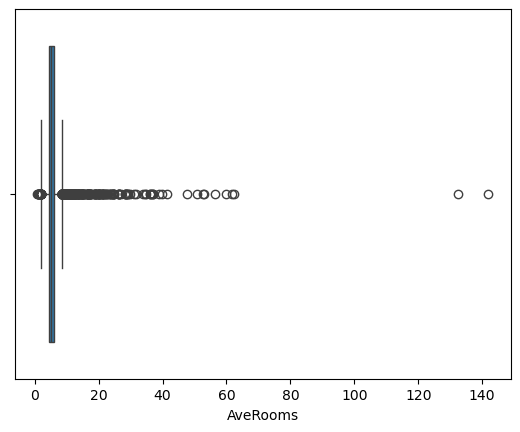

In [90]:
import seaborn as sns
sns.boxplot(x=housing.frame['AveRooms'])

In [92]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MedInc          2.179850
HouseAge       19.000000
AveRooms        1.611665
AveBedrms       0.093447
Population    938.000000
AveOccup        0.852520
Latitude        3.780000
Longitude       3.790000
MEDV            1.451250
dtype: float64


In [94]:
data.shape

(20640, 9)

In [96]:
housing_df_o1 = data.copy()

In [98]:
housing_df_out = housing_df_o1[~((housing_df_o1 < (Q1 - 1.5 * IQR)) |(housing_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
housing_df_out.shape

(16312, 9)

In [102]:
data = housing_df_out.copy()

In [104]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

In [106]:
x = data.drop(['MEDV'], axis = 1)

In [108]:
y = data['MEDV']

In [110]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25


In [112]:
y.head()

2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
Name: MEDV, dtype: float64

In [114]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [116]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [118]:
xtrain.shape

(11418, 8)

In [120]:
xtest.shape

(4894, 8)

# DECISION TREE REGRESSION

In [122]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()

In [124]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [126]:
ypred = dtr.predict(xtest)

In [128]:
ypred

array([3.874, 0.59 , 1.784, ..., 2.225, 3.977, 2.178])

In [130]:
ytest

15192    3.623
2093     0.498
19424    1.313
11838    0.878
9586     1.216
         ...  
12147    0.986
1481     1.657
8337     1.538
9754     3.366
18563    1.732
Name: MEDV, Length: 4894, dtype: float64

In [132]:
mean_squared_error(ypred, ytest)

0.41244336217002453

# Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rf_regressor =RandomForestRegressor(1000)
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=1000)

In [145]:
ypred = rf_regressor.predict(xtest)

In [147]:
mean_squared_error(ypred, ytest)

0.19074638881822326